In [465]:
!pip install wordcloud

In [466]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import altair as alt

In [484]:
df_21_22 = pd.read_csv("datasets/PEN America's Index of School Book Bans (July 1, 2021 - June 30, 2022) - Sorted by Author & Title.csv") #Dataset link: https://docs.google.com/spreadsheets/d/1hTs_PB7KuTMBtNMESFEGuK-0abzhNxVv4tgpI5-iKe8/edit?usp=sharing
df_22_23 = pd.read_csv("datasets/PEN America's Index of School Book Bans (July 1, 2022 - June 30, 2023) - Sorted by Author & Title.csv") #Dataset link: https://docs.google.com/spreadsheets/d/1a6v7R7pidO7TIwRZTIh9T6c0--QNNVufcUUrDcz2GJM/edit?usp=sharing# Dataset Link: https://docs.google.com/spreadsheets/d/1XbmNW9YRCqiC9852VIb8IBZik0ALvKCi0ykMPW_kC80/edit?gid=0#gid=0
#df_23_24 = pd.read_csv("/content/Main_Table 10.2.csv", encoding_errors="ignore") #can't use until permission given
df_98_99 = pd.read_csv("datasets/Copy of challenged_books_1998-99 - Sheet1.csv") # Dataset Link: https://docs.google.com/spreadsheets/d/1xDt6R_AM7eAr7tPkE-NDwOr2sDjIDYbRo8bWpsKvPAc/edit?usp=sharing
df_97_98 = pd.read_csv("datasets/Copy of challenged_books_1997-98 - Sheet1.csv")

In [468]:
df_21_22 = df_21_22.rename(columns={"Unnamed: 0":"Author", "Unnamed: 1":"Title", "PEN AMERICA'S INDEX OF SCHOOL BOOK BANS":"Ban Status", "Unnamed: 3":"Secondary Author(s)", "Unnamed: 4":"Illustrator(s)", "Unnamed: 5":"Translator(s)", "Unnamed: 6":"State", "Unnamed: 7":"District", "Unnamed: 8":"Date of Challenge/Removal", "Unnamed: 9":"Origin of Challenge"})
df_21_22 = df_21_22.drop(index=0)
df_21_22 = df_21_22.drop(index=1)

In [469]:
df_97_98.drop("ID", axis=1, inplace=True)
state_abbreviations = {'AL': 'Alabama','AK': 'Alaska','AZ': 'Arizona','AR': 'Arkansas','CA': 'California','CO': 'Colorado','CT': 'Connecticut','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','IA': 'Iowa','KA': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','ME': 'Maine','MD': 'Maryland','MA': 'Massachusetts','MI': 'Michigan','MN': 'Minnesota','MS': 'Mississippi','MO': 'Missouri','MT': 'Montana','NE': 'Nebraska','NV': 'Nevada','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NY': 'New York','NC': 'North Carolina','ND': 'North Dakota','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VT': 'Vermont','VA': 'Virginia','WA': 'Washington','WV': 'West Virginia','WI': 'Wisconsin','WY': 'Wyoming'}
df_98_99["State"] = df_98_99["State"].replace(state_abbreviations, inplace=True)
df_97_98["State"] = df_97_98["State"].replace(state_abbreviations, inplace=True)

In [470]:
df_22_23 = df_22_23.rename(columns={"Unnamed: 0":"Title", "Unnamed: 1":"Author", "PEN AMERICA'S INDEX OF SCHOOL BOOK BANS":"Secondary Author(s)", "Unnamed: 3":"Illustrator(s)", "Unnamed: 4":"Translator(s)", "Unnamed: 5":"Series Name", "Unnamed: 6":"State", "Unnamed: 7":"District", "Unnamed: 8":"Date of Challenge/Removal", "Unnamed: 9":"Ban Status", "Unnamed: 10":"Origin of Challenge"})
df_22_23 = df_22_23.drop(index=0)
df_22_23 = df_22_23.drop(index=1)
df_22_23 = df_22_23.drop(index=600)


In [471]:
merged = pd.concat([df_21_22, df_22_23, df_97_98, df_98_99]).sort_values(by="Title").reset_index(drop=True)
merged = merged.dropna(subset=['Author'])
merged = merged.dropna(subset=['Title'])
merged = merged.dropna(subset=['State'])
merged = merged.dropna(subset=['District'])
merged.head()


Author                                              Title  \
0        Delpit, Lisa  "Multiplication Is for White People": Raising ...   
1  Thomas, Rachael L.               #BlackLivesMatter: Protesting Racism   
2  Thomas, Rachael L.               #BlackLivesMatter: Protesting Racism   
3        Ukazu, Ngozi                                            #Hockey   
4        Ukazu, Ngozi                                            #Hockey   

                             Ban Status Secondary Author(s) Illustrator(s)  \
0                  Banned in Classrooms                 NaN            NaN   
1          Banned Pending Investigation                 NaN            NaN   
2          Banned Pending Investigation                 NaN            NaN   
3  Banned from Libraries and Classrooms                 NaN            NaN   
4          Banned Pending Investigation                 NaN            NaN   

  Translator(s)         State                                District  \
0           NaN  Pennsylvania            Central York School District   
1           NaN       Florida     Indian River County School District   
2           NaN         Texas  North East Independent School District   
3           NaN         Texas      Frisco Independent School District   
4           NaN       Florida             Clay County School District   

  Date of Challenge/Removal              Origin of Challenge  ...  \
0               August 2021                    Administrator  ...   
1             November 2021                    Administrator  ...   
2             December 2021                    Administrator  ...   
3             November 2022               Informal Challenge  ...   
4              AY 2022-2023  Administration/Formal Challenge  ...   

  Data_Entry_Date Links1 Links2  Links3  Links4  Last_Updated   ID Genre1  \
0             NaN    NaN    NaN     NaN     NaN           NaN  NaN    NaN   
1             NaN    NaN    NaN     NaN     NaN           NaN  NaN    NaN   
2             NaN    NaN    NaN     NaN     NaN           NaN  NaN    NaN   
3             NaN    NaN    NaN     NaN     NaN           NaN  NaN    NaN   
4             NaN    NaN    NaN     NaN     NaN           NaN  NaN    NaN   

  Genre2 Genre3  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4    NaN    NaN  

[5 rows x 43 columns]

In [472]:
author_counts = merged.groupby(['Author', 'Title']).size().reset_index(name='count')

In [473]:
merged_authors = merged['Author'].astype(str)
merged_authors.head()
formatted_authors = merged_authors.apply(lambda name: " ".join(name.split(", ")[::-1]))
formatted_authors
normalized_authors = formatted_authors.apply(
    lambda name: " ".join(name.split(", ")[::-1]) if ", " in name else name
)

author_frequencies = normalized_authors.value_counts()
author_dict = author_frequencies.to_dict()

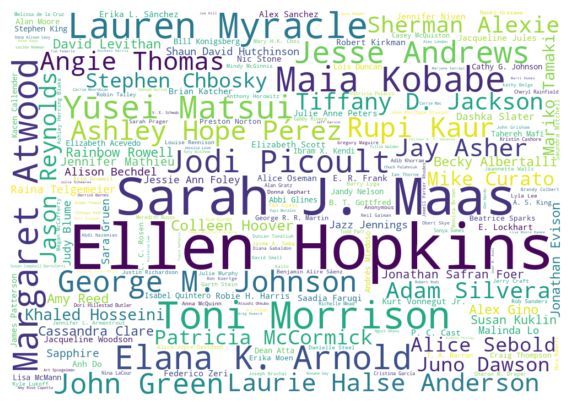

In [474]:
words = WordCloud(width=1000, height=700, background_color='white').generate_from_frequencies(author_dict)
plt.figure(figsize=(10,5))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.show()


In [475]:
merged_title = merged['Title'].astype(str)
merged_title.head()
formatted_title = merged_title.apply(lambda name: " ".join(name.split(" ")[::-1]))
formatted_title
normalized_title = formatted_title.apply(
    lambda name: " ".join(name.split(", ")[::-1]) if ", " in name else name
)

title_frequencies = normalized_title.value_counts()
title_dict = title_frequencies.to_dict()

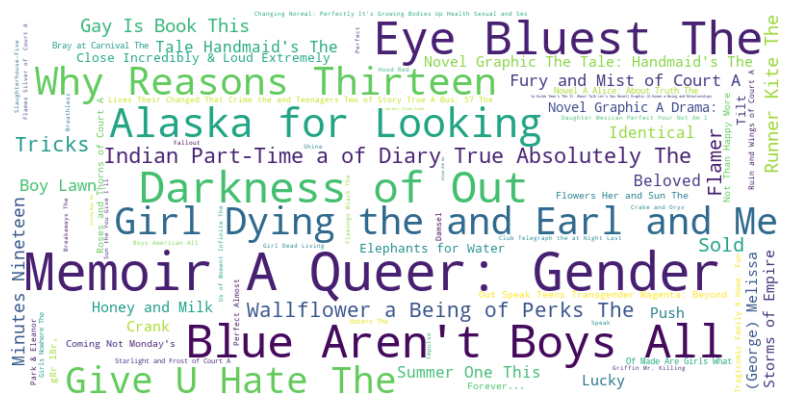

In [476]:
words2 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    prefer_horizontal=0.5,
    random_state=42,
).generate_from_frequencies(title_dict)
plt.figure(figsize=(10,5))
plt.imshow(words2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [477]:
merged_state = merged['State'].astype(str)
merged_state.head()
formatted_state = merged_state.apply(lambda name: " ".join(name.split(" ")[::-1]))
formatted_state
normalized_state = formatted_state.apply(
    lambda name: " ".join(name.split(", ")[::-1]) if ", " in name else name
)

state_frequencies = normalized_state.value_counts()
state_dict = state_frequencies.to_dict()

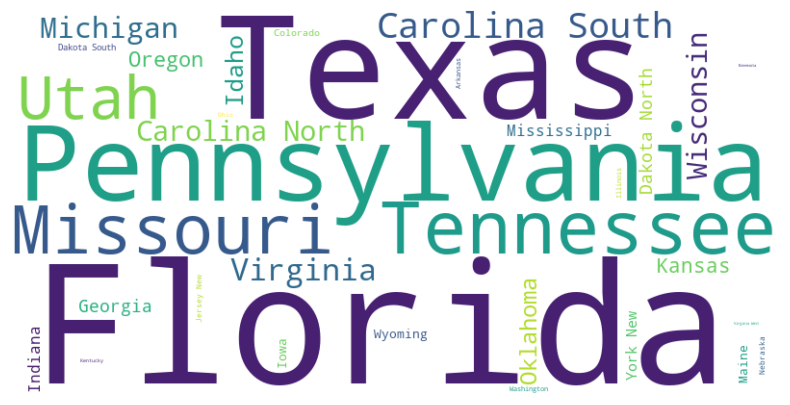

In [478]:
words3 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    prefer_horizontal=0.5,
    random_state=42,
).generate_from_frequencies(state_dict)
plt.figure(figsize=(10,5))
plt.imshow(words3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [479]:
merged = merged[merged['State'] != None]
book_data = merged.groupby(['Title', 'Author'], as_index=False).agg(
    BanCount=('State', 'count'),
    States=('State', lambda x: ', '.join(sorted(set(s for s in x if s != 'null')))),
    Districts=('District', lambda x: ', '.join(sorted(set(s for s in x if s != 'null'))))
)

In [480]:
alt.data_transformers.disable_max_rows()
book_selection = alt.selection_point(fields=['Title'], name="SelectBook", bind='legend')

states = alt.Chart(merged).mark_bar().encode(
    x=alt.X('State:N', title='State'),
    y=alt.Y('count():Q', title='Ban Occurrences in State'),
    color='State:N',
    tooltip=['State', 'Title', 'Author']
).properties(
    width=400,
    height=200,
    title='States Where Books Were Banned'
)

# Display the chart
states.configure_title(
    fontSize=16
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).show()

alt.Chart(...)

In [481]:
author_ban_count = book_data.groupby('Author', as_index=False).agg(
    TotalBans=('BanCount', 'sum')
).sort_values(by='TotalBans', ascending=False).head(50)

In [482]:
top_authors_books = pd.merge(book_data, author_ban_count[['Author']], on='Author')
top_books = (
    top_authors_books.loc[top_authors_books.groupby('Author')['BanCount'].idxmax()]
    .reset_index(drop=True)
)

In [483]:
top_books['BookDetails'] = top_books['Title'] + ' (' + top_books['BanCount'].astype(str) + ' bans)'

author_selection = alt.selection_single(fields=['Author'], name="SelectAuthor", empty='all')

# Chart: Top 50 Most Banned Authors and their Most Banned Book on hover
bars = alt.Chart(top_books).mark_bar().encode(
    x=alt.X('Author:N', title='Author'),
    y=alt.Y('BanCount:Q', title='Total Ban Count'),
    color=alt.Color('Author:N', legend=alt.Legend(title='Select an Author')),
    opacity=alt.condition(author_selection, alt.value(1), alt.value(0.3))  # Highlight selected author
).add_params(
    author_selection
).properties(
    width=600,
    height=300,
    title='Top 50 Most Banned Authors'
)

# Tooltip encoding to show details on hover
bars = bars.encode(
    tooltip=[
        alt.Tooltip('Author:N', title='Author'),
        alt.Tooltip('BookDetails:N', title='Most Banned Book'),
        alt.Tooltip('States:N', title='States Banned'),
    ]
)

# Create the final chart with hover interaction
final_chart = bars

final_chart.show()

/var/folders/69/895q17bx0dq354540c0zkfx40000gn/T/ipykernel_32644/4067970458.py:3: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  author_selection = alt.selection_single(fields=['Author'], name="SelectAuthor", empty='all')


alt.Chart(...)